In [25]:
#Data wrangling
import pandas as pd
import numpy as np
#Dataviz
import seaborn as sns 
import matplotlib.pyplot as plt 
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#Stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy import stats
#misc
import itertools
import functools
import os

# Data description - all are daily stock exchange returns
ISE: Istanbul stock exchange national 100 index

SP: Standard & Poor™s 500 return index

DAX: Stock market return index of Germany

FTSE: Stock market return index of UK

NIKKEI: Stock market return index of Japan

BOVESPA: Stock market return index of Brazil

In [3]:
#df_ISE = pd.read_excel('E:\\Data\\data_akbilgic.xlsx',header=1)
df_TS = pd.read_csv('E:\\Data\\TS regression - data_akbilgic.csv')

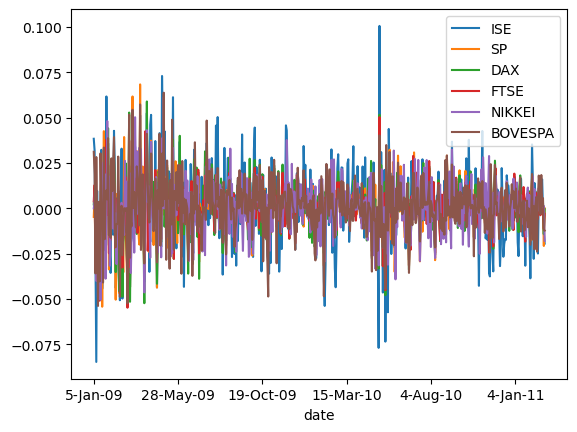

In [4]:
df = df_TS.set_index('date',drop=True)
df.plot()
plt.show()

# Questions

### Q1a:Determine if all the TS are stationary qualitatively

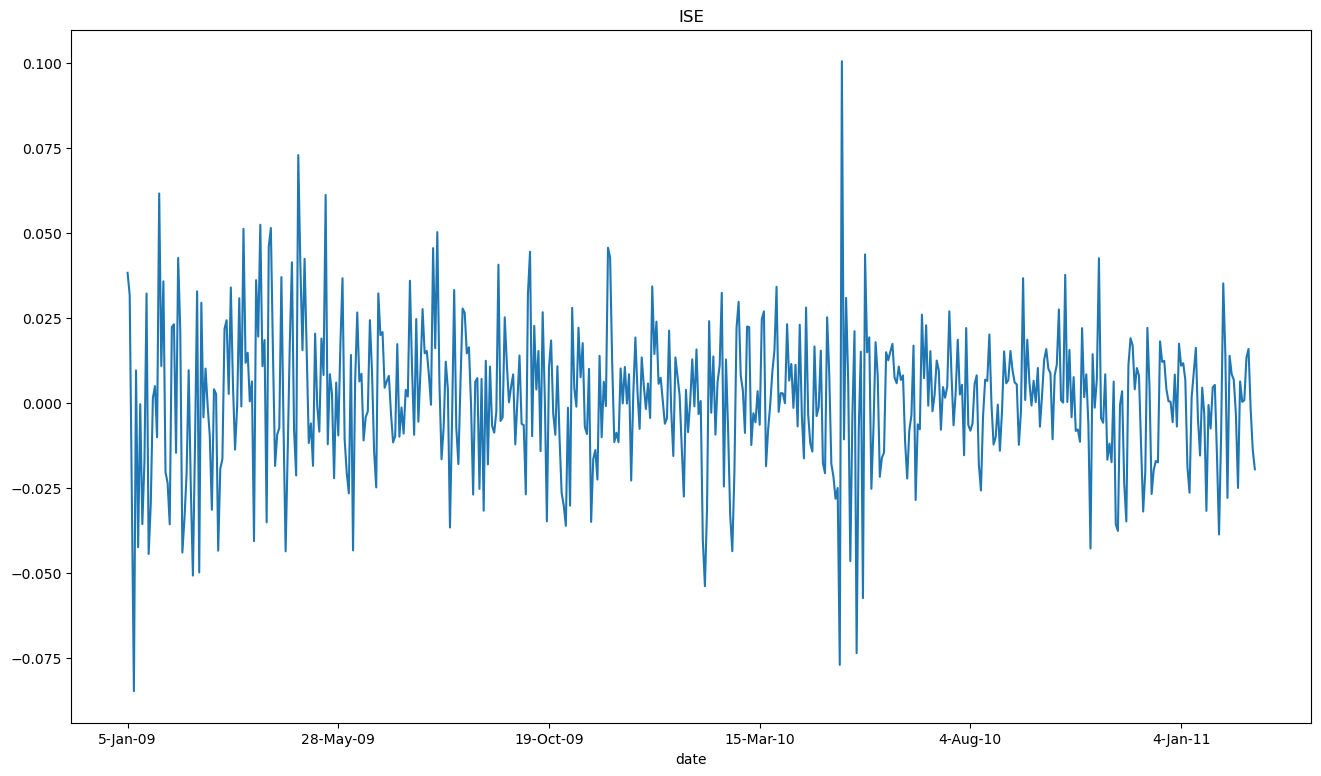

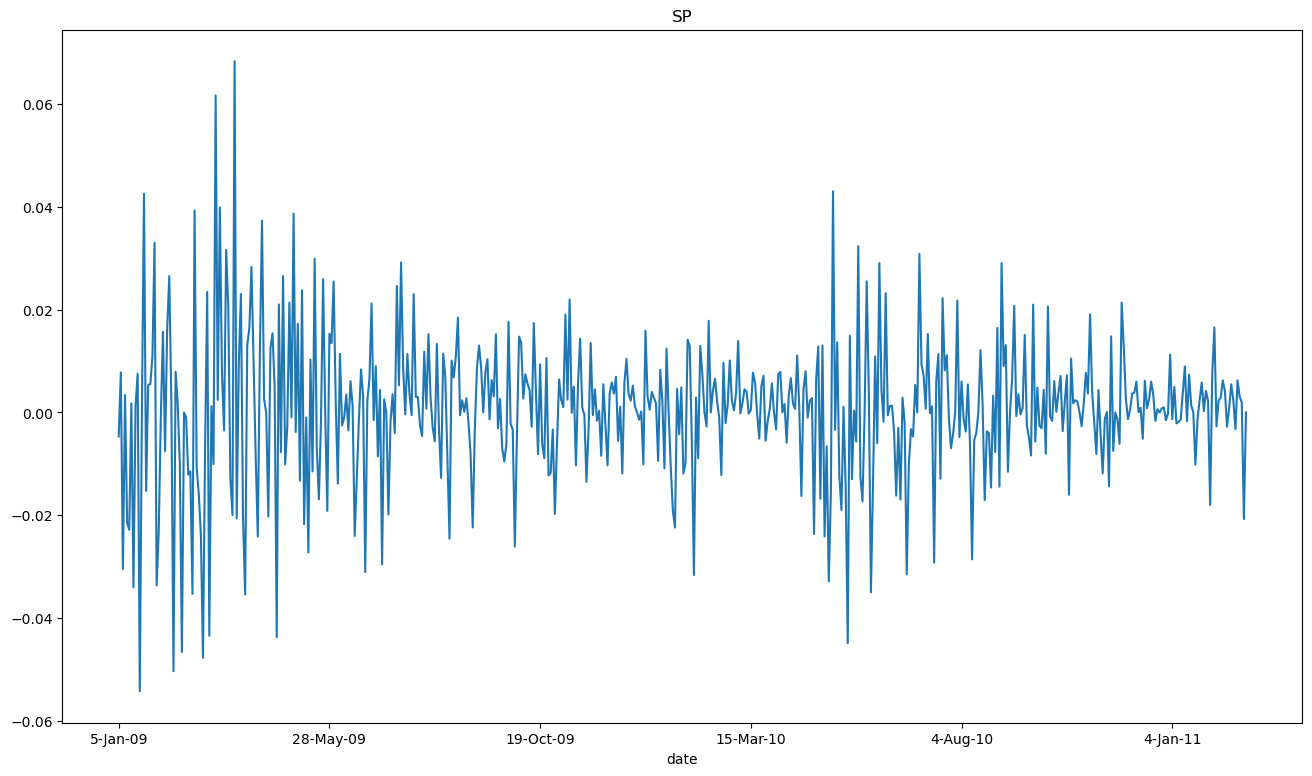

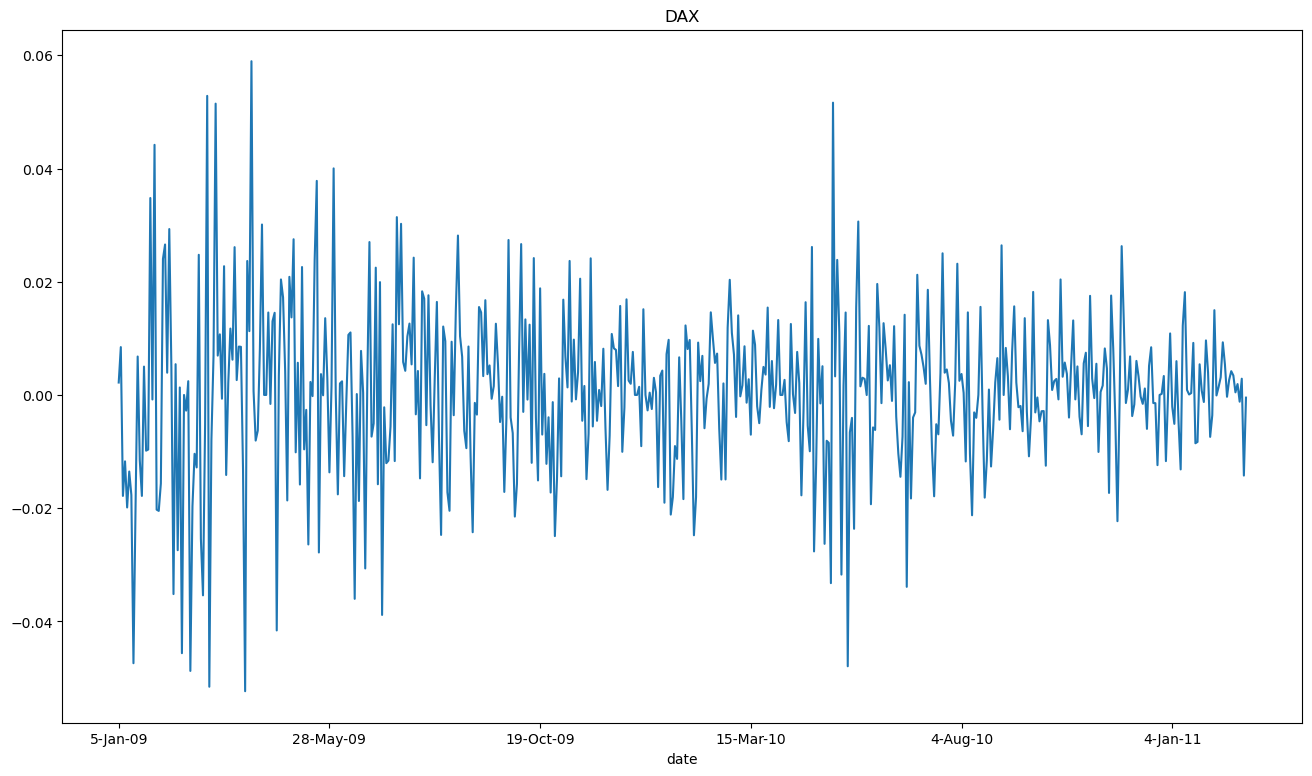

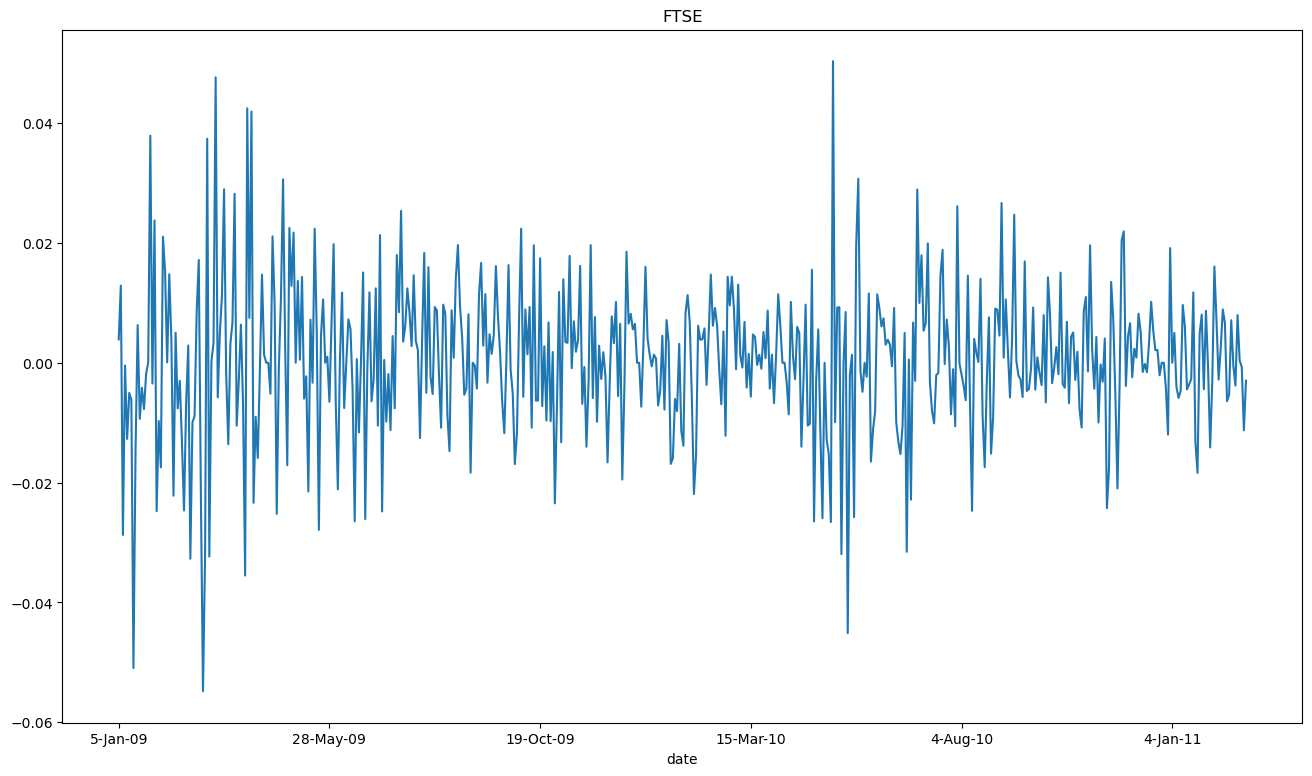

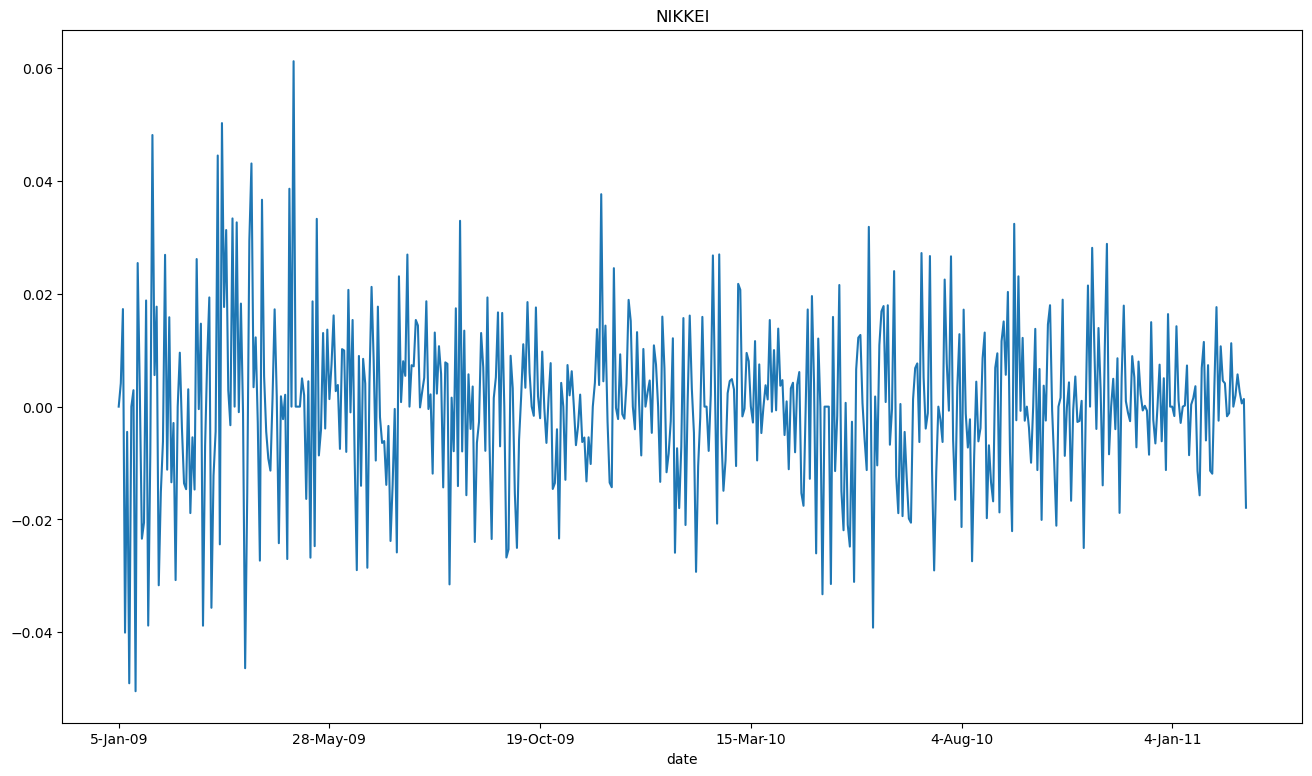

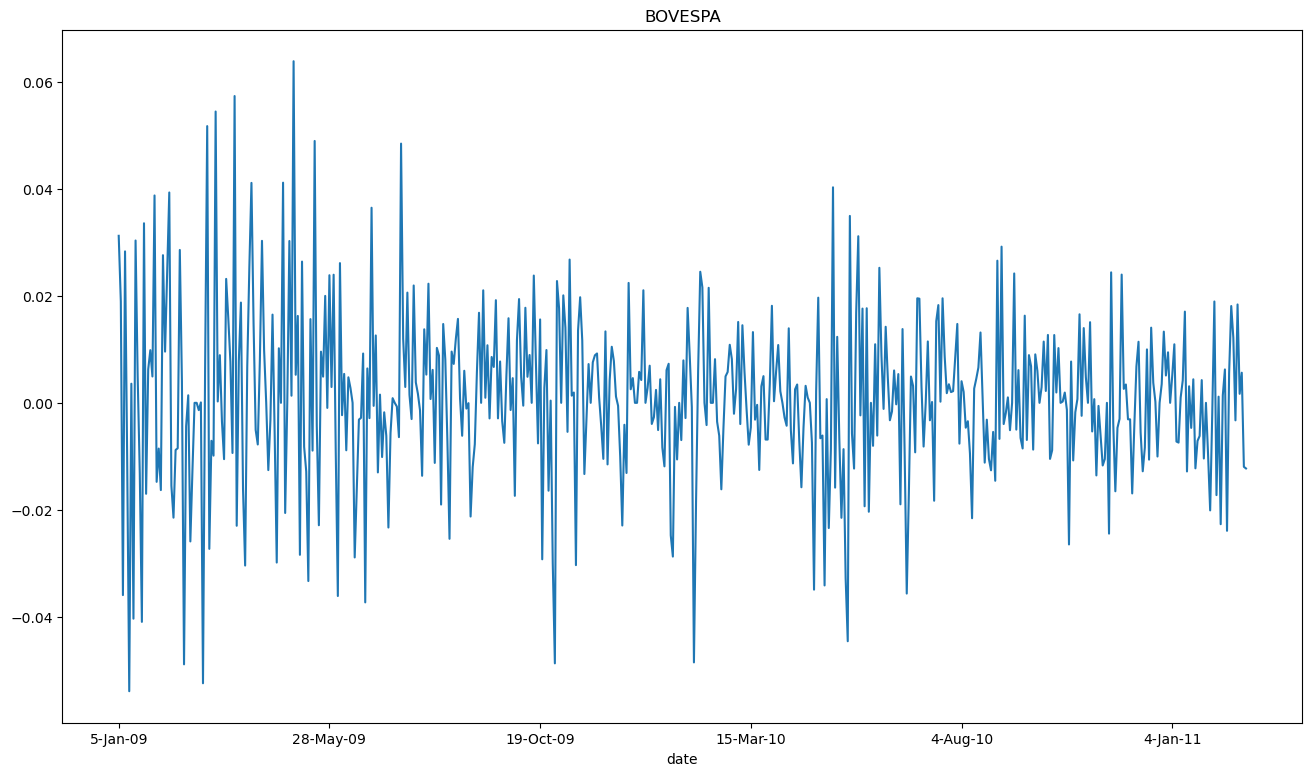

In [5]:
for stock in df.columns:
    df[stock].plot(figsize = (16,9))
    plt.title(stock)
    plt.show()

Qualitative Analysis
- BOVESPA
    - [x]  No Trend (Expected Value)
    - [ ]  No time-varient varaince
    - [x]  No seasonality
- NIKKEL
    - [x]  No Trend (Expected Value)
    - [x]  No time-varient varaince
    - [x]  No seasonality
- FTSE
    - [x]  No Trend (Expected Value)
    - [x]  No time-varient varaince
    - [x]  No seasonality
- DAX
    - [x]  No Trend (Expected Value)
    - [x]  No time-varient varaince
    - [x]  No seasonality
- SP
    - [x]  No Trend (Expected Value)
    - [ ]  No time-varient varaince
    - [x]  No seasonality
- ISE
    - [x]  No Trend (Expected Value)
    - [x]  No time-varient varaince
    - [x]  No seasonality

### Q1b:Determine if all the TS are stationary using 
- ADF
- KPSS

In [5]:
from statsmodels.tsa.stattools import adfuller,kpss

In [6]:
def Update(ts):
    global test_result
    #ADF
    adf_res = adfuller(ts)
    test_result['ADF_stat'].append( adf_res[0] )
    test_result['ADF_p'].append( adf_res[1] ) 
    #KPSS reg = c
    kpss_c_res = kpss(ts, regression='c')
    test_result['KPSS_c_stat'].append(  kpss_c_res[0])
    test_result['KPSS_c_p'] .append(  kpss_c_res[1])
    #KPSS reg = ct
    kpss_ct_res = kpss(ts, regression='ct')
    test_result['KPSS_ct_stat'] .append( kpss_ct_res[0])
    test_result['KPSS_ct_p'].append(  kpss_ct_res[1])

In [ ]:
test_result = {'ADF_stat':[],'ADF_p':[],'KPSS_c_stat':[],'KPSS_c_p':[],
               'KPSS_ct_stat':[],'KPSS_ct_p':[]}
for col in df.columns:
    print(col)
    ts = df[col]
    Update(ts)

In [16]:
res_table = pd.DataFrame(test_result,index=df.columns)
shresh_hold = 0.05
res_table['ADF_Stationary'] = res_table.ADF_p < shresh_hold
res_table['KPSS_c_Stationary'] = res_table.KPSS_c_p > shresh_hold
res_table['KPSS_ct_Stationary'] = res_table.KPSS_ct_p > shresh_hold
res_table

,ADF_stat,ADF_p,KPSS_c_stat,KPSS_c_p,KPSS_ct_stat,KPSS_ct_p,ADF_Stationary,KPSS_c_Stationary,KPSS_ct_Stationary
ISE,-21.510292,0.000000e+00,0.213546,0.1,0.076109,0.1,True,True,True
SP,-11.031207,5.662219e-20,0.084823,0.1,0.076493,0.1,True,True,True
DAX,-23.056516,0.000000e+00,0.080165,0.1,0.058977,0.1,True,True,True
FTSE,-23.257919,0.000000e+00,0.080940,0.1,0.078982,0.1,True,True,True
NIKKEI,-24.935022,0.000000e+00,0.062994,0.1,0.066698,0.1,True,True,True
BOVESPA,-24.300499,0.000000e+00,0.269061,0.1,0.036107,0.1,True,True,True


## 2.Split the data into train and test, keeping only the last 10 rows for test (from date 9-Feb-11). Remember to use only train dataset for #3 to #6.

In [91]:
Train = df[:-10]
Test = df[-10:]

## 3. Linearly regress ISE against the remaining 5 stock index returns - determine which coefficients are equal or better than 0.02 (*) level of significance?

In [111]:
X_train = Train[['SP','DAX','FTSE','NIKKEI','BOVESPA']]
y_train = Train['ISE']
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ISE   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.20e-74
Time:                        13:49:24   Log-Likelihood:                 1458.8
No. Observations:                 526   AIC:                            -2906.
Df Residuals:                     520   BIC:                            -2880.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.330      0.1

### The following coef are better than 0.02 alpha:
- DAX            
- FTSE
- NIKKEI         

### 4. For the non-significant coefficients, continue to lag by 1 day until all coefficients are better than 0.02 (*) level of significance. Use slide() function from package DataCombine. Remember you will need to lag, so you slideBy = -1 each step. How many lags are needed for each independent variable?

In [45]:
def slide(df,features,slideBy):
    "Return a new, slided df"
    out = df.copy()
    temp = dict()
    #Step 1,create replaced columns
    for feature in features:
        if  slideBy < 0:  #Down-lag,Slide down
            out[feature] = [None for i in range(abs(slideBy))] + list(X2.SP[:slideBy])
        elif slideBy > 0: #Up-lag,Slide Up
            out[feature] =  list(X2.SP[slideBy:]) + [None for i in range(abs(slideBy))]
    return out 

In [64]:
def all_significant(est,alpha=0.02,white_list = ['const']):
    #return sum(est.pvalues > alpha) - tol <= 0 
    res = list(est.pvalues[(est.pvalues > alpha)].keys())
    #print('\t',est.pvalues[(est.pvalues > alpha)])
    out = [i for i in res if i not in white_list]
    if out == []:
        return True,out
    else:
        return False,out
    

In [89]:
X2

,const,SP,DAX,FTSE,NIKKEI,BOVESPA
date,,,,,,
6-Jan-09,1.0,-0.004679,0.008455,0.012866,0.004162,-0.004679
7-Jan-09,1.0,0.007787,-0.017833,-0.028735,0.017293,0.007787
8-Jan-09,1.0,-0.030469,-0.011726,-0.000466,-0.040061,-0.030469
9-Jan-09,1.0,0.003391,-0.019873,-0.012710,-0.004474,0.003391
12-Jan-09,1.0,-0.021533,-0.013526,-0.005026,-0.049039,-0.021533
...,...,...,...,...,...,...
2-Feb-11,1.0,0.016556,-0.000083,0.007075,0.017641,0.016556
3-Feb-11,1.0,-0.002726,0.001392,-0.002804,-0.002489,-0.002726
4-Feb-11,1.0,0.002351,0.003127,0.002354,0.010695,0.002351


In [112]:
allSig,lag_vars = all_significant(est2)
lag = 0
Train_new = Train.copy()
while not allSig:
    lag += 1 
    print(f"{lag_vars} down lag {lag}")
    #Lag data 
    Train_new = slide(Train_new,lag_vars,slideBy = -1)
    Train_new = Train_new.dropna()
    X_train = Train_new[['SP','DAX','FTSE','NIKKEI','BOVESPA']]
    X_temp = sm.add_constant(X_train)                   
    y_temp = Train_new['ISE']
    #Train new model with adjusted data
    est = sm.OLS(y_temp, X_temp)
    est3 = est.fit()
    allSig,lag_vars = all_significant(est3)
print('######################        Lagging Complete               ########################')

	 const      0.183979
SP         0.430970
BOVESPA    0.075087
dtype: float64
['SP', 'BOVESPA'] down lag 1
	 const    0.248354
dtype: float64
######################        Lagging Complete               ########################


In [94]:
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ISE   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           5.92e-78
Time:                        13:44:33   Log-Likelihood:                 1463.2
No. Observations:                 525   AIC:                            -2916.
Df Residuals:                     520   BIC:                            -2895.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.156      0.2

### Find correlations between ISE and each independent variable. Sum the square of the correlations. How does it compare to R-squared from #4?

In [118]:
cor_list = [pearsonr(X_temp[col], y_temp)[0]**2 for col in X2 if col != 'const']
print(cor_list)
print(sum(cor_list))
#The sum square of correlation is much higher than the R2 of Q4

[0.09601369460982913, 0.40013442043884945, 0.4219269351008242, 0.15472393830812395, 0.09601369460982913]
1.168812683067456


### 6.Concept question 1 - why do you think the R-squared in #4 is so much less than the sum of square of the correlations?

In [ ]:
# R square is bounded by 1, whereas the sum square of correlations can go to infinity if there are infinity independent variables

### 7.Take the test dataset - perform the same lags from #4 and call predict() function using the lm regression object from #4. Why do you need to use the lm function object from #4?

In [124]:
X_test = Test[['SP','DAX','FTSE','NIKKEI','BOVESPA']]
X_test = sm.add_constant(X_test)                   
y_test = Test['ISE']
y_pred = est3.predict(X_test)

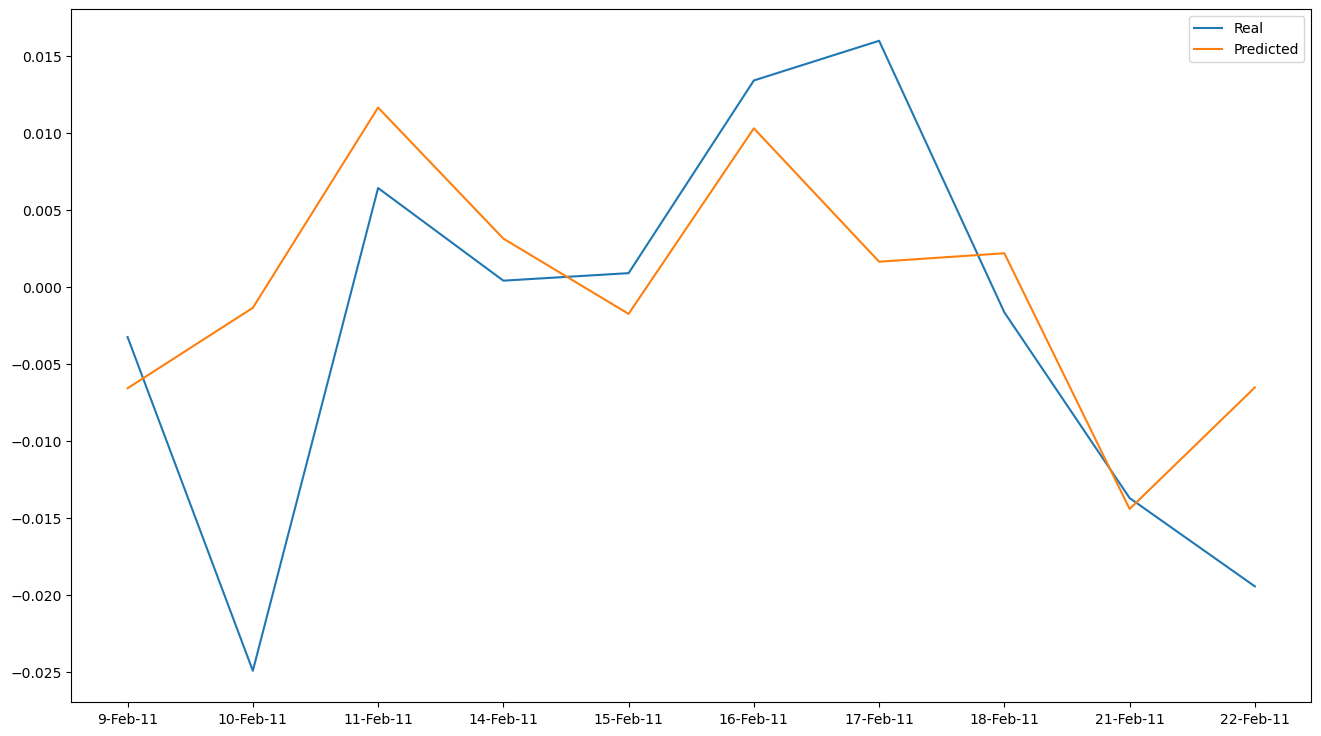

In [128]:
plt.figure(figsize=(16,9))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Real','Predicted'])
plt.show()

### 8.Concept question 2 - what do you find in #1 and why?

In [129]:
#The prediction seems fairly well. I think it's because all the time sereis are stationary.